In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. ASMR

In [79]:
asmr = pd.read_csv("ASMR.csv", on_bad_lines='skip',sep=None)
asmr.head(20)

C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_13844\107745329.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  asmr = pd.read_csv("ASMR.csv", on_bad_lines='skip',sep=None)


,Year,Finland,Germany
0,2008,1024.012659,3809.690805
1,2009,1016.267602,3758.278080
2,2010,1010.770135,3686.916881
3,2011,978.882983,3670.945983
4,2012,981.092211,3651.183987
5,2013,953.690733,3666.841359
6,2014,949.791778,3487.907094
7,2015,925.774946,3597.280571
8,2016,934.163255,3487.802625
9,2017,912.468393,3481.878258


In [80]:
asmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     13 non-null     int64  
 1   Finland  13 non-null     float64
 2   Germany  13 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 440.0 bytes


In [81]:
# summary statistics
asmr[["Finland", "Germany"]].agg(["count", "min", "max", "median", "mean","skew"])

,Finland,Germany
count,13.000000,13.000000
min,881.915784,3390.859073
max,1024.012659,3809.690805
median,949.791778,3597.280571
mean,951.494999,3585.874850
skew,0.166843,0.148391


C:\Users\Big City Girl\AppData\Local\Temp\ipykernel_13844\2127675904.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])


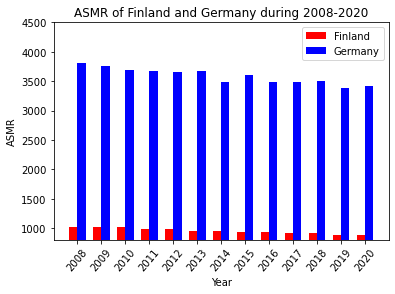

In [57]:

n_groups = 13
index = np.arange(n_groups)
bar_width = 0.35

fig, ax = plt.subplots()

plt.bar(index, asmr.Finland, bar_width, color='r', label='Finland')
plt.bar(index + bar_width, asmr.Germany, bar_width, color='b', label='Germany')
plt.ylim(800, 4500)
ax.set_xticklabels([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
plt.xlabel("Year")
plt.ylabel("ASMR")
plt.title("ASMR of Finland and Germany during 2008-2020")
ax.set_xticks(index + bar_width / 2)
plt.xticks(rotation=50)
ax.legend()

In [77]:
w1, pvalue1 = stats.shapiro(asmr['Germany'])
print("Germany: ")
w1, pvalue1  # follow normal distribution

Germany: 


(0.9421570897102356, 0.48543548583984375)

In [76]:
w, pvalue = stats.shapiro(asmr['Finland'])
print("Finland: ")
w, pvalue  # follow normal distribution

Finland: 


(0.9452097415924072, 0.5277827978134155)

Text(0.5, 1.0, 'Fit Values: 3585.87 and 126.97')

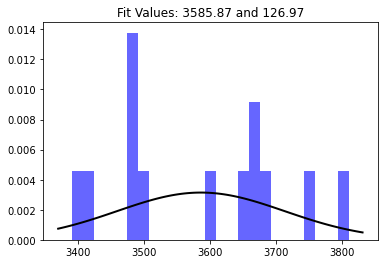

In [70]:

from scipy.stats import norm
mu, std = norm.fit(asmr['Germany']) 
plt.hist(asmr['Germany'], bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

Text(0.5, 1.0, 'Fit Values: 951.49 and 45.91')

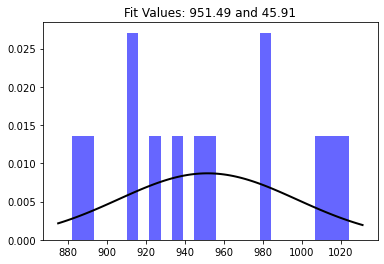

In [68]:
from scipy.stats import norm
mu, std = norm.fit(asmr['Finland']) 
plt.hist(asmr['Finland'], bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

In [82]:
# test homogeneity of variance
stat, p = stats.bartlett(asmr['Finland'], asmr['Germany'])
stat, p  # not equal variance 

(10.297917642789052, 0.001331804119126633)

In [85]:
# perform two-sided test. 
stats.mannwhitneyu(x=asmr['Finland'], y=asmr['Germany'], alternative = 'two-sided') # ASMR is signiwficantly different from each other, unlikely to have occurred by chance

MannwhitneyuResult(statistic=0.0, pvalue=1.6496665061862602e-05)

In [86]:
stats.mannwhitneyu(x=asmr['Finland'], y=asmr['Germany'], alternative = 'greater') #  ASMR in Finland is not significantly greater than Germany.

MannwhitneyuResult(statistic=0.0, pvalue=0.999993466328969)

## The increase or decrease in ASMR

In [89]:
asmr["Finland"] = asmr["Finland"].apply(lambda x: x-asmr["Finland"][12])
asmr["Germany"] = asmr["Germany"].apply(lambda x: x-asmr["Germany"][12])

In [90]:
asmr.head(20)

,Year,Finland,Germany
0,2008,134.556341,386.981892
1,2009,126.811284,335.569167
2,2010,121.313817,264.207968
3,2011,89.426666,248.237069
4,2012,91.635894,228.475074
5,2013,64.234415,244.132446
6,2014,60.335460,65.198181
7,2015,36.318628,174.571658
8,2016,44.706937,65.093711
9,2017,23.012076,59.169345
